# Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

In [73]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading csv data and inpecting obtained dataframe

In [74]:
df = pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


**Has life expectancy increased over time in the six nations?**

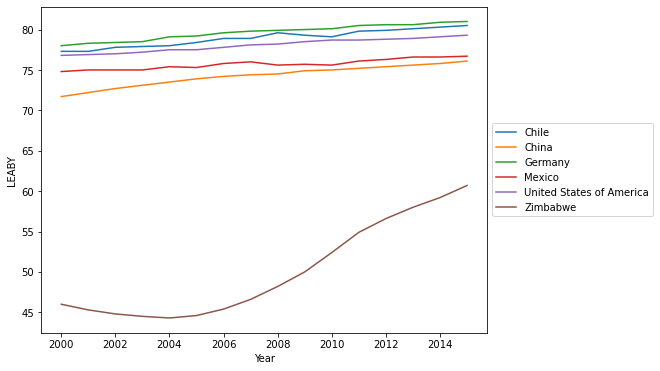

In [75]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df[LEABY], hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("LEABY");

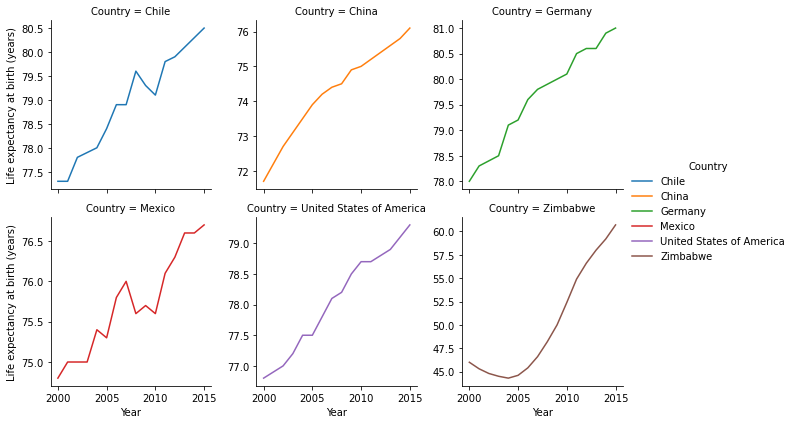

In [76]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year",LEABY)
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

Obviosly the LEABY significantly increases in Zimbabwe

**Has GDP increased over time in the six nations?**

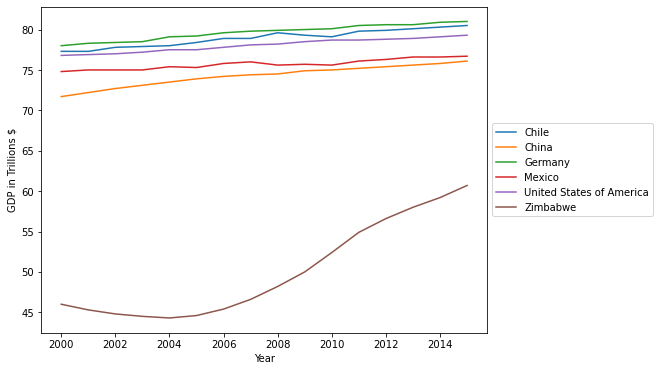

In [77]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df[LEABY], hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions $");

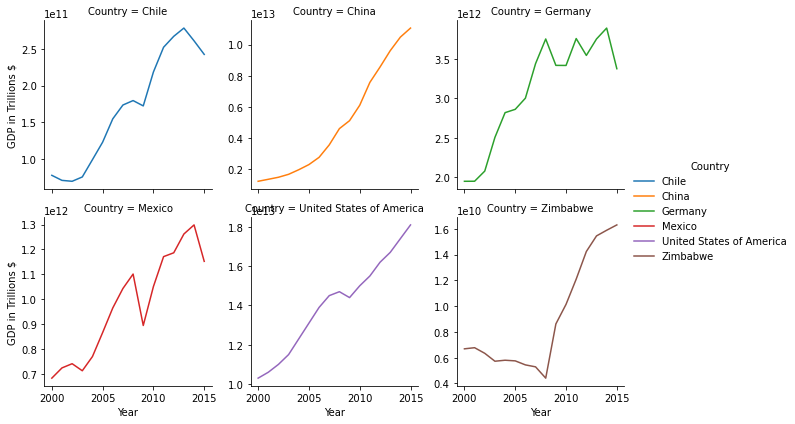

In [78]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year",'GDP')
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions $"))

graphGDP;

According to the charts above GDP increases steadily in every country except of Zimbabwe (adrupt increasing since 2004).

**Is there a correlation between GDP and life expectancy of a country?**

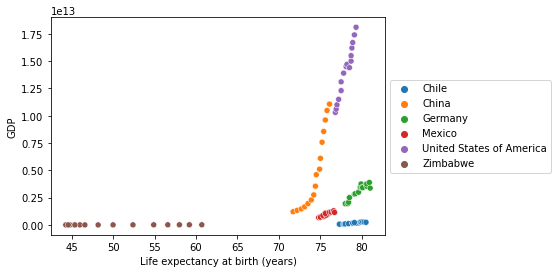

In [79]:
sns.scatterplot(x=df[LEABY], y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

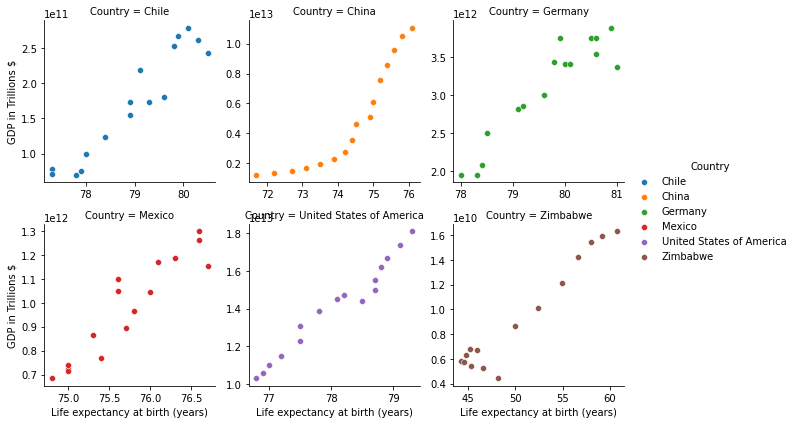

In [80]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graph = (graph.map(sns.scatterplot,'Life expectancy at birth (years)','GDP')
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)","GDP in Trillions $"));

There is a positive correlation between GDP and life expectancy for countries in our list.

**What is the average life expectancy in these nations?**

In [81]:
df_means = df.groupby("Country").mean().reset_index()

In [82]:
df_means

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


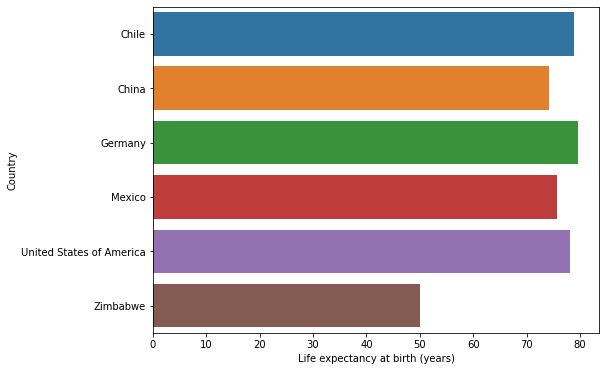

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(x='Life expectancy at birth (years)', y="Country", data=df_means)
plt.xlabel("Life expectancy at birth (years)");

Average life expectancy is more than 70 years for all contries exept Zimbabwe which was 50.

**What is the distribution of that life expectancy?**

In [84]:
df[LEABY].describe()

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64

<AxesSubplot:xlabel='Life expectancy at birth (years)', ylabel='Density'>

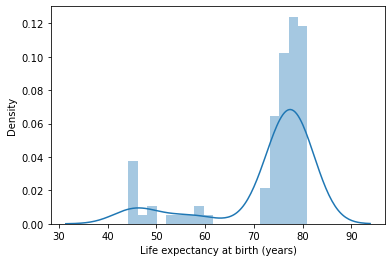

In [85]:
sns.distplot(df[LEABY])

According to the histogram of the LEABY:

- Deviation from a normal distribution
- Negatively skewed distribution 
- High peakedness